In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd


In [3]:
# Loading the dataset
df = pd.read_csv(r"Restaurant_reviews.tsv", delimiter='\t', quoting=3, keep_default_na=False)

In [4]:
df.shape

(1000, 2)

In [5]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [6]:
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


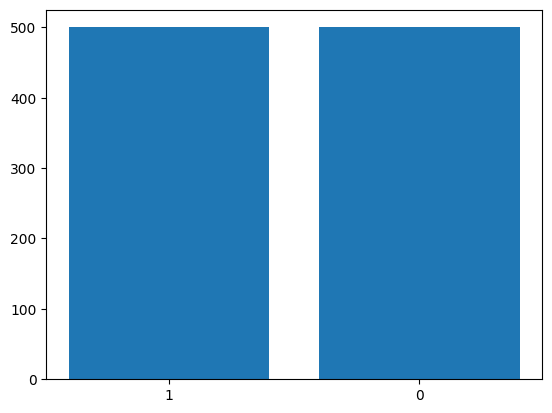

In [64]:
import matplotlib.pyplot as plt
labels, values = zip(*Counter(df.iloc[:,1]).items())
width = 1
indexes = np.arange(len(labels))
plt.bar(indexes, values)
plt.xticks(indexes + width * 0, labels)
plt.show()

# **Data Preprocessing**

In [6]:
# Importing essential libraries for performing Natural Language Processing on 'Restaurant_Reviews.tsv' dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')
all_stopwords.remove('against')
all_stopwords.remove('no')
all_stopwords.remove('nor')
all_stopwords.remove("aren")
all_stopwords.remove("couldn")
all_stopwords.remove("don")
all_stopwords.remove("doesn")
all_stopwords.remove("didn")
all_stopwords.remove("hasn")
all_stopwords.remove("hadn")
all_stopwords.remove("haven")
all_stopwords.remove("isn")
all_stopwords.remove("wasn")
all_stopwords.remove("wouldn")
all_stopwords.remove("shouldn")
all_stopwords.remove("weren")
all_stopwords.remove("won")
all_stopwords.remove("aren't")
all_stopwords.remove("couldn't")
all_stopwords.remove("don't")
all_stopwords.remove("doesn't")
all_stopwords.remove("didn't")
all_stopwords.remove("hasn't")
all_stopwords.remove("hadn't")
all_stopwords.remove("haven't")
all_stopwords.remove("isn't")
all_stopwords.remove("wasn't")
all_stopwords.remove("wouldn't")
all_stopwords.remove("shouldn't")
all_stopwords.remove("weren't")
all_stopwords.remove("won't")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# Cleaning the reviews
corpus = []
for i in range(0,1000):

    # Cleaning special character from the reviews
    review = re.sub(pattern='[^a-zA-Z]',repl=' ', string=df['Review'][i])

    # Converting the entire review into lower case
    review = review.lower()

    # Tokenizing the review by words
    review_words = review.split()

    # Removing the stop words
    review_words = [word for word in review_words if not word in all_stopwords]

    # Stemming the words
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]

    # Joining the stemmed words
    review = ' '.join(review)

    # Creating a corpus
    corpus.append(review)

In [8]:
corpus[0:10]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'ask extra ketchup tissu didn provid',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch']

In [9]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = df.iloc[:, 1].values

In [10]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
df.iloc[:, 0].values

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "asked for extra ketchup and tissues but they didn't provide",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       '"I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!"',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a 

In [12]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Model Building

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [15]:
# Predicting the Test set results
y_pred = classifier_NB.predict(X_test)

In [16]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 80.5%
Precision score is: 0.81
Recall score is: 0.82


In [17]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[77, 20],
       [19, 84]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

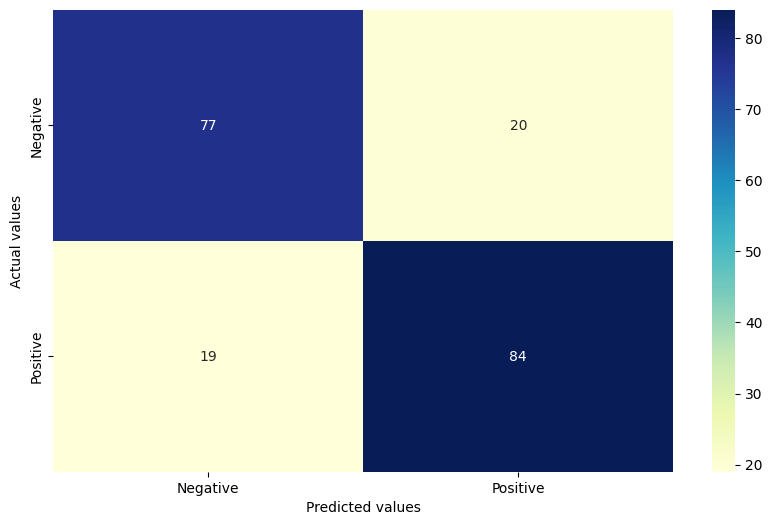

In [19]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [20]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 79.0%
Accuracy score for alpha=0.2 is: 80.0%
Accuracy score for alpha=0.3 is: 80.0%
Accuracy score for alpha=0.4 is: 80.5%
Accuracy score for alpha=0.5 is: 81.0%
Accuracy score for alpha=0.6 is: 80.5%
Accuracy score for alpha=0.7 is: 80.5%
Accuracy score for alpha=0.8 is: 80.5%
Accuracy score for alpha=0.9 is: 80.5%
Accuracy score for alpha=1.0 is: 80.5%
--------------------------------------------
The best accuracy is 81.0% with alpha value as 0.5


In [21]:
classifier = MultinomialNB(alpha=0.5)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.5)

# Using SVM

In [22]:
# Fitting SVM to the Training set
from sklearn import svm
classifier_SVM = svm.SVC()
classifier_SVM.fit(X_train, y_train)

SVC()

In [23]:
# Predicting the Test set results
y_pred = classifier_SVM.predict(X_test)

In [24]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 81.5%
Precision score is: 0.9
Recall score is: 0.72


In [25]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [26]:
cm

array([[89,  8],
       [29, 74]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

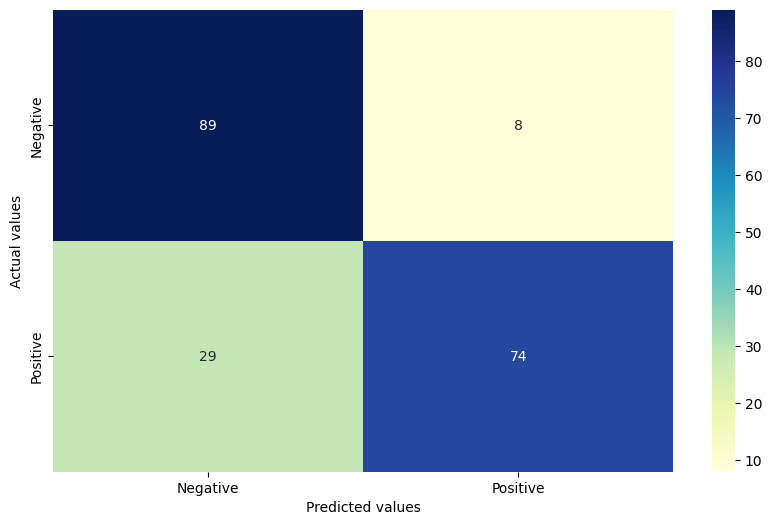

In [27]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier_Random = RandomForestClassifier(max_depth=10, random_state=0)
classifier_Random.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [29]:
# Predicting the Test set results
y_pred = classifier_Random.predict(X_test)

In [30]:
# Accuracy, Precision and Recall
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3 = recall_score(y_test,y_pred)
print("---- Scores ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

---- Scores ----
Accuracy score is: 77.5%
Precision score is: 0.9
Recall score is: 0.63


In [31]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [32]:
cm

array([[90,  7],
       [38, 65]], dtype=int64)

Text(95.72222222222221, 0.5, 'Actual values')

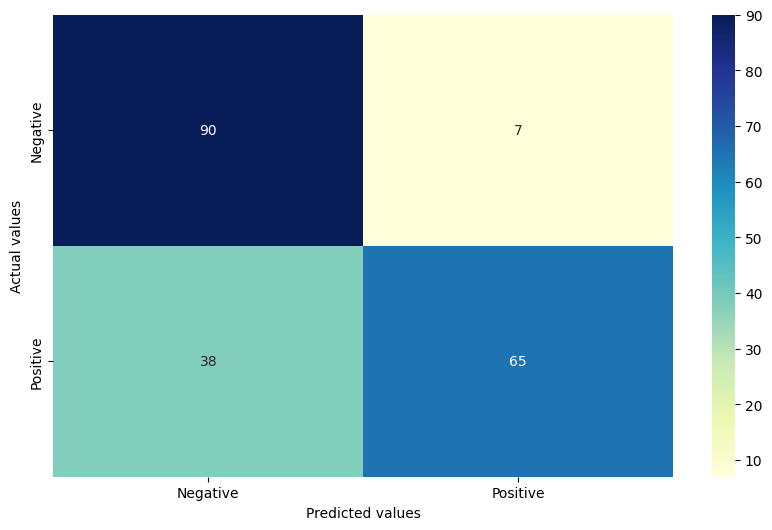

In [33]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10,6))
sns.heatmap(cm, annot=True, cmap="YlGnBu", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Predictions

In [34]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in all_stopwords]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)

    temp = cv.transform([final_review]).toarray()
    return classifier_SVM.predict(temp)

In [35]:
# Predicting values
sample_review = 'The food was absolutely wonderful, from preparation to presentation, very pleasing.'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [1]:
sample_review = "Had to wait 10 mins to handover the key to the valet driver and another 1 hr and 10 mins to get the table on Sunday afternoon.
"Opted for sit-in buffet and each item came in quickly."e
"Food was okay and I don't find any wow factor in it."
"Lots of waiters going up and down but we need to chase someone in case if we need repeat or so"

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

SyntaxError: EOL while scanning string literal (2396317623.py, line 1)

In [37]:
sample_review = "Good veg restaurant in t-nagar. Waiting place is there and valet parking is available. 
"It's spacious and can accommodate around 75 -90 person per sitting."
if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [40]:
from bs4 import BeautifulSoup
from selenium import webdriver

url = "https://www.zomato.com/chennai/"
restaurant = input("Enter the restaurant name: ")
url = url + restaurant.replace(" ", "-").lower() + "/reviews"
reviews = []

driver = webdriver.Edge()
driver.get(url)

class_re = "[a-z]{2}\-?*\-[0-9] [a-z]{2}\-?* ?*"
class_name = input("Enter class name for the reviews: ")

soup = BeautifulSoup(driver.page_source, 'html.parser')
class_elements = soup.find_all(class_=class_name)

for element in class_elements:
    if element.text.strip() != "":
        reviews.append(element.text.strip())
        
for review in reviews:
    if predict_sentiment(review):
        print(review)
        print('This is a POSITIVE review.')
    else:
        print(review)
        print('This is a NEGATIVE review!')


Enter the restaurant name: flower drum egmore
Enter class name for the reviews: sc-1hez2tp-0 sc-bCQtTp dOfOoZ
Not given cutlery
This is a NEGATIVE review!
the baby corn is smelling
This is a NEGATIVE review!
